Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

Generating Random Dataset

In [2]:
np.random.seed(457)
mean = [0, 0]
cov = [[1, 0], [0, 100]]
n_std=3
x, y = np.random.multivariate_normal(mean, cov, 5000).T

Defining the Pearson Correlation Coefficient

In [3]:
if x.size != y.size:
        raise ValueError("x and y must be of the same dimensions")
else:

    # x, y : bivariate normal dataset
    # ax : matplotlib.axes.Axes
    #     The axes object to draw the ellipse into.
    # n_std : float
    #     The number of standard deviations to determine the ellipse's radiuses.

    # Finding the Covariance Matrix of the two normally distributed datasets
    cov = np.cov(x, y)

    # The Standard Deviation of a dataset can be calculated by finding the 
    # square root of the variance of that dataset
    sigma_x = np.sqrt(cov[0, 0])
    sigma_y = np.sqrt(cov[1, 1])
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    #To scale the dataset
    scale_x = sigma_x * n_std
    scale_y = sigma_y * n_std

    # The Pearson Correlation Coefficient can be calculated as 
    #cov(x,y)/(sigma_x*sigma_y)
    corr = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1,1])
    # From the calculations, the parameters of the Confidence Ellipse 
    #that can be formed from the above datasets is given by the radii:
    #radius_x = (1+p)^(1/2) and radius_y = (1-p)^(1/2)
    radius_x = np.sqrt(1 + corr)
    radius_y = np.sqrt(1 - corr)

    ellipse = Ellipse((0,0), width=radius_x * 10, height=radius_y * 10)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

def ConfidenceEllipse(x, y, ax, n_std=3, **kwargs):
    
    ellipse = Ellipse((0,0), width=radius_x * 10, height=radius_y * 10, **kwargs)
    ellipse.set_transform(transf + ax.transData)
    # Get the path
    path = ellipse.get_path()
    # Get the list of path vertices

    vertices = path.vertices.copy()
    # Transform the vertices so that they have the correct coordinates

    xx,yy=vertices.T

    return ellipse,xx,yy #ax.add_patch(ellipse)
    
        
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
        
    return   


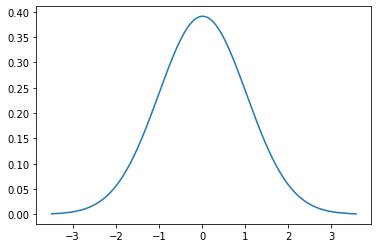

In [7]:
from scipy.stats import norm
import statistics

x.sort()
y.sort()

# Calculating mean and standard deviation
mean_x = statistics.mean(x)
sigma_x = statistics.stdev(x)
mean_y = statistics.mean(x)
sigma_y = statistics.stdev(x)

# Plotting the Probability Distribution Function of dataset: gives us a bell shaped curve
plt.plot(x, norm.pdf(x, mean_x, sigma_x))
plt.plot(y, norm.pdf(y, mean_y, sigma_y))
plt.show()

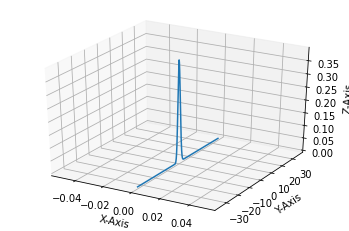

In [94]:
# importing numpy package
import numpy as np
# importing matplotlib package
import matplotlib.pyplot as plt
 
# Creating an empty canvas(figure)
fig = plt.figure()
 
# Using the gca function, we are defining
# the current axes as a 3D projection
ax = fig.gca(projection='3d')
 
# Labelling X-Axis
ax.set_xlabel('X-Axis')
 
# Labelling Y-Axis
ax.set_ylabel('Y-Axis')
 
# Labelling Z-Axis
ax.set_zlabel('Z-Axis')
 
# Creating 100 values for X
# in between 0 and 1
 
# Creating 100 values for Y
# in between 0 and 1
 
# Creating a sine curve
# z = np.sin(x * 2 * np.pi) / 2 + 0.5
 
# zdir='z' fixes all the points to zs=0 and
# (x,y) points are ploted in the x-y axis
# of the graph
# ax.plot(x, y, zs=0, zdir='z')

# # zdir='y' fixes all the points to zs=0 and
# # (x,y) points are ploted in the x-z axis of the
# # graph
# ax.plot(x, y, zs=0, zdir='y')
 
# zdir='z' fixes all the points to zs=0 and
# (x,z) points are ploted in the x-y axis of
# the  graph
ax.plot(y, norm.pdf(y, mean_y, sd_y), zs=0, zdir='x', )
 
# Showing the above plot
plt.show()

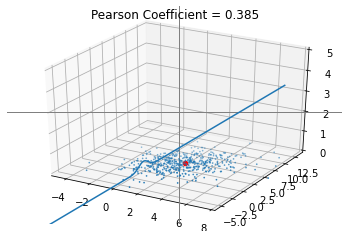

In [95]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(567)
latent = np.random.randn(500, 2)
dependency = np.array([
    [0.9, 0.4],
    [0.1, -0.6]
])
mu = np.array([2, 4]).transpose()
scale = np.array([2, 4]).transpose()
dependent = latent.dot(dependency)
scaled = dependent * scale
scaled_with_offset = scaled + mu

data = np.array([[-3,2,5],[-4,-3,5]]).transpose()
pearson = ConfidenceEllipse(scaled_with_offset[:,0],scaled_with_offset[:,1], ax, facecolor='blue', edgecolor='red')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_with_offset[:,0], scaled_with_offset[:,1], s=0.5)
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
ax.scatter([mu[0]], [mu[1]],c='red')

#Test

ax.plot(y, norm.pdf(y, mean_y, sd_y), zs=0, zdir='x', )

#Test
ax.set_xlim(-5,8)
ax.set_ylim(-6,14)
ax.set_zlim(0,5)
ax.set_title(f'Pearson Coefficient = {pearson:.3f}')
plt.show()  

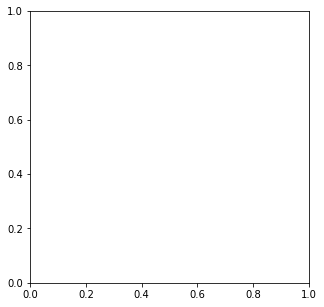

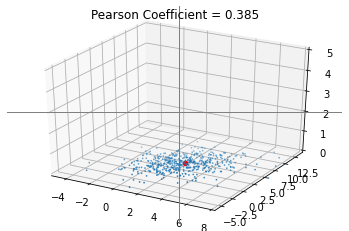

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
np.random.seed(567)
latent = np.random.randn(500, 2)
dependency = np.array([
    [0.9, 0.4],
    [0.1, -0.6]
])
mu = np.array([2, 4]).transpose()
scale = np.array([2, 4]).transpose()
dependent = latent.dot(dependency)
scaled = dependent * scale
scaled_with_offset = scaled + mu

data = np.array([[-3,2,5],[-4,-3,5]]).transpose()
pearson = ConfidenceEllipse(scaled_with_offset[:,0],scaled_with_offset[:,1], ax, facecolor='none', edgecolor='red')

ax.scatter(scaled_with_offset[:,0], scaled_with_offset[:,1], s=0.5)
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
ax.scatter([mu[0]], [mu[1]],c='red')

ax.set_xlim(-5,8)
ax.set_ylim(-6,14)
ax.set_title(f'Pearson Coefficient = {pearson:.3f}')
plt.show()

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(scaled_with_offset[:,0], scaled_with_offset[:,1], s=0.5)
ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)
ax.scatter([mu[0]], [mu[1]],c='red')

ax.set_xlim(-5,8)
ax.set_ylim(-6,14)
ax.set_zlim(0,5)
ax.set_title(f'Pearson Coefficient = {pearson:.3f}')
plt.show()  